In [ ]:
# Performed in line with Simplilearn's learning content

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report,accuracy_score
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler

c:\users\siddhartha borpuzari\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Cake/Muffin prediction

In [3]:
recipes=pd.read_csv('recipes_muffins_cupcakes.csv')
recipes.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


In [4]:
recipes.shape

(20, 9)

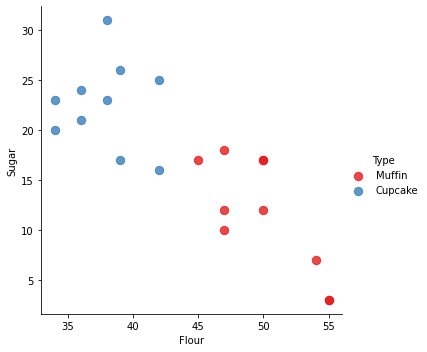

In [5]:
# Plot the data
sns.lmplot('Flour','Sugar',data=recipes,hue='Type',palette='Set1',fit_reg=False,scatter_kws={"s":70})

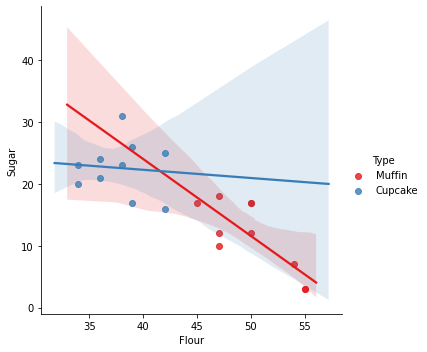

In [6]:
# Plot the data
sns.lmplot('Flour','Sugar',data=recipes,hue='Type',palette='Set1',fit_reg=True)

In [7]:
# Pre-processing of data
type_label=np.where(recipes['Type']=='Muffin',0,1)
type_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
recipe_features=recipes.columns.values[1:].tolist()
recipe_features

['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

In [9]:
ingredients=recipes[['Flour','Sugar']].values
print(ingredients)

[[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [54  7]
 [47 10]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]


In [10]:
from sklearn import svm
model=svm.SVC(kernel='linear')
model.fit(ingredients,type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [11]:
# Predict muffin or cupcake
def muffin_or_cupcake(flour,sugar):
    if(model.predict([[flour,sugar]]))==0:
        print("This is a Muffin recipe")
    else:
        print("This is a cupcake recipe")

In [12]:
muffin_or_cupcake(30,27)

This is a cupcake recipe


In [13]:
# Digit recognition

In [14]:
from sklearn.datasets import load_digits
from sklearn import metrics
digits=load_digits()

In [15]:
print("Image data shape ",digits.data.shape)
print("Label data shape ",digits.target.shape)

Image data shape  (1797, 64)
Label data shape  (1797,)


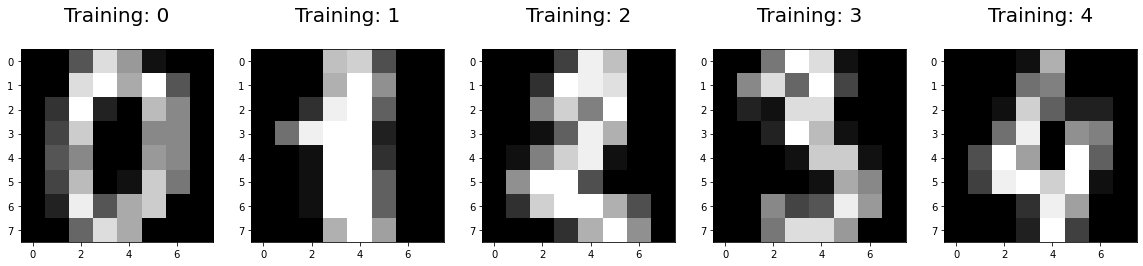

In [16]:
plt.figure(figsize=(20,4))
for index,(image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title("Training: %i\n" %label,fontsize=20)

In [17]:
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.25,random_state=42)

In [18]:
x_train.shape,x_test.shape

((1347, 64), (450, 64))

In [19]:
y_train.shape,y_test.shape

((1347,), (450,))

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

c:\users\siddhartha borpuzari\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\siddhartha borpuzari\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
predictions=lr.predict(x_test)

In [24]:
score=lr.score(x_test,y_test)
print(score)

0.9666666666666667


In [25]:
cm=metrics.confusion_matrix(y_test,predictions)
print(cm)

[[42  0  0  0  1  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  1  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  1  0  0  1  0]
 [ 0  1  0  0 54  0  0  0  0  0]
 [ 0  0  1  0  0 56  0  0  1  1]
 [ 0  0  0  0  0  1 44  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  1]
 [ 0  1  0  0  0  1  0  0 36  0]
 [ 0  0  0  0  0  0  0  0  3 45]]


Text(0.5, 1.0, 'Accuracy score: 0.9666666666666667')

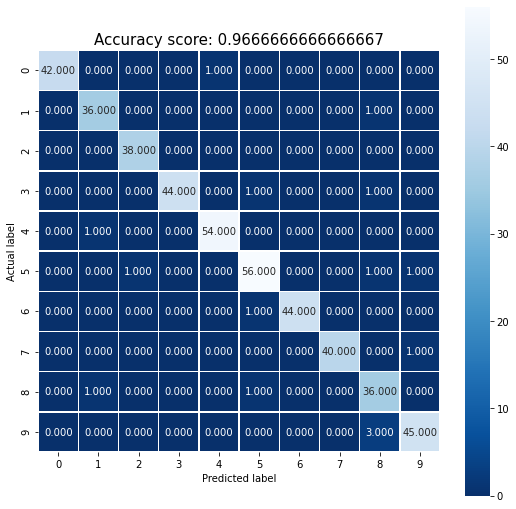

In [26]:
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt=".3f",linewidths=0.5,square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title='Accuracy score: {0}'.format(score)
plt.title(all_sample_title,size=15)

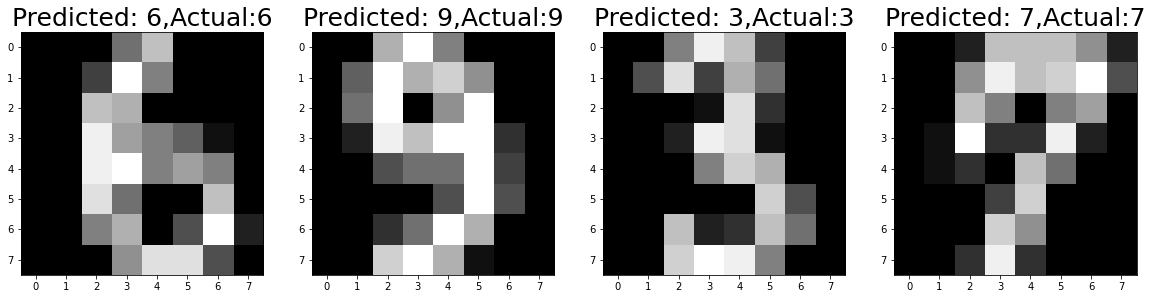

In [27]:
index=0
classifiedIndex=[]
for predict,actual in zip(predictions,y_test):
    if predict==actual:
        classifiedIndex.append(index)
    index+=1
plt.figure(figsize=(20,10))
for plotIndex,digit in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4,plotIndex+1)
    plt.imshow(np.reshape(x_test[digit],(8,8)),cmap=plt.cm.gray)
    plt.title("Predicted: {},Actual:{}".format(predictions[digit],y_test[digit]),fontsize=25)
    